# Ejercicio 2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def dP_dt(t, P, r, K):
    return r * P * (1 - P / K)


In [ ]:
P0 = 10
r = 0.1
K = 1000
h = 0.1
T = 20

In [ ]:
def runge_kutta_4th_order(P0, r, K, h, T):
    n_steps = int(T / h)
    P = P0
    t = 0
    results = [(t, P)]

    for _ in range(n_steps):
        k1 = h * dP_dt(t, P, r, K)
        k2 = h * dP_dt(t + h/2, P + k1/2, r, K)
        k3 = h * dP_dt(t + h/2, P + k2/2, r, K)
        k4 = h * dP_dt(t + h, P + k3, r, K)

        P += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        results.append((t, P))

    return results

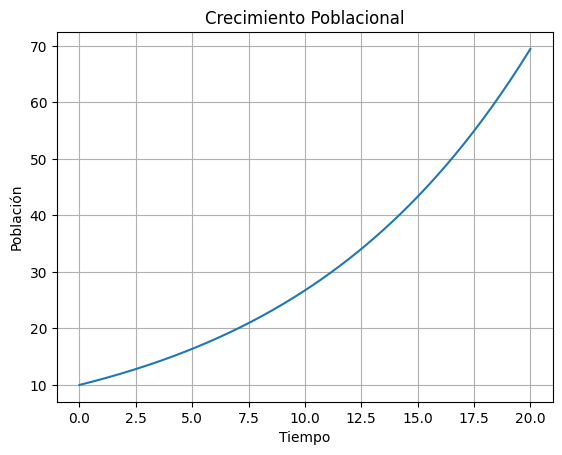

Población estimada en T=20: 69.45315964722215


In [ ]:
import matplotlib.pyplot as plt

results = runge_kutta_4th_order(P0, r, K, h, T)
t_values = [t for t, P in results]
P_values = [P for t, P in results]

plt.plot(t_values, P_values)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento Poblacional')
plt.grid(True)
plt.show()

# Estimar la población en T = 20
P_T20 = P_values[-1]
print(f'Población estimada en T=20: {P_T20}')

# Ejercicio 2.2 - Depredador - Presa


 Utilice el método de cuarto orden de Runge-Kutta para estimar las poblaciones a lo largo del tiempo y trazar el resultado.

In [23]:
# Parámetros iniciales del modelo de Lotka-Volterra
R0 = 40  # Presas iniciales
P0 = 9   # Depredadores iniciales
alpha = 0.1  # Tasa de crecimiento de las presas
beta = 0.02  # Tasa de mortalidad de las presas por depredación
delta = 0.01  # Tasa de crecimiento de los depredadores por consumo de presas
gamma = 0.1  # Tasa de mortalidad de los depredadores
h = 0.1  # Tamaño de paso del tiempo
T = 50  # Tiempo Total


In [26]:
# Funciones para las derivadas del modelo depredador-presa
def dR_dt(R, P):
    return alpha * R - beta * R * P

def dP_dt( R, P):
    return delta * R * P - gamma * P

In [31]:
# método de Runge-Kutta de cuarto orden
n = int(T / h) + 1  # Número de pasos
R = np.zeros(n)
P = np.zeros(n)
t = np.linspace(0, T, n)  # vector de tiempo

R[0], P[0] = R0, P0  # Condiciones iniciales

for i in range(1, n):
    k1_R = h * dR_dt(R[i-1], P[i-1])
    l1_P = h * dP_dt(R[i-1], P[i-1])

    k2_R = h * dR_dt(R[i-1] + 0.5 * k1_R, P[i-1] + 0.5 * l1_P)
    l2_P = h * dP_dt(R[i-1] + 0.5 * k1_R, P[i-1] + 0.5 * l1_P)

    k3_R = h * dR_dt(R[i-1] + 0.5 * k2_R, P[i-1] + 0.5 * l2_P)
    l3_P = h * dP_dt(R[i-1] + 0.5 * k2_R, P[i-1] + 0.5 * l2_P)

    k4_R = h * dR_dt(R[i-1] + k3_R, P[i-1] + l3_P)
    l4_P = h * dP_dt(R[i-1] + k3_R, P[i-1] + l3_P)

    R[i] = R[i-1] + (k1_R + 2 * k2_R + 2 * k3_R + k4_R) / 6
    P[i] = P[i-1] + (l1_P + 2 * l2_P + 2 * l3_P + l4_P) / 6



R(50) = 3.07
P(50) = 0.54


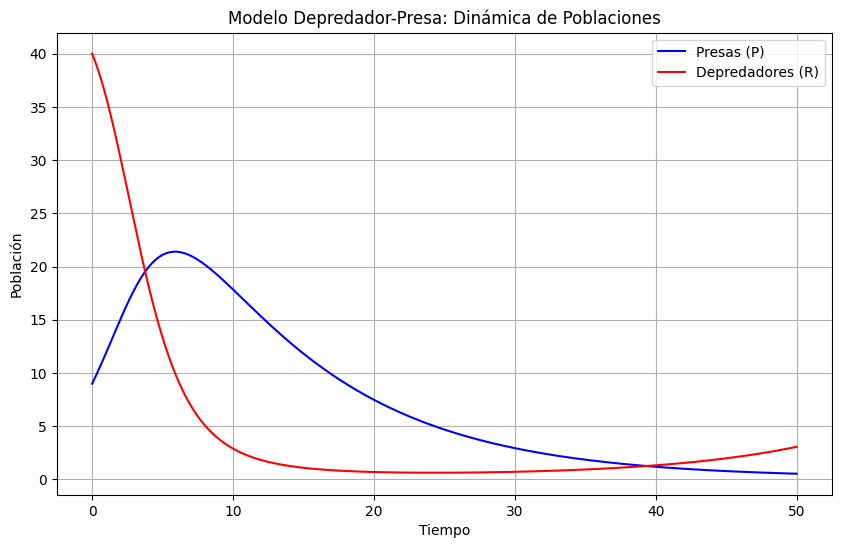

In [32]:
# resultados
plt.figure(figsize=(10, 6))
plt.plot(t, P, label='Presas (P)', color='blue')
plt.plot(t, R, label='Depredadores (R)', color='red')
plt.title('Modelo Depredador-Presa: Dinámica de Poblaciones')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()



### ¿Cuál es el estimado de las poblaciones en tiempo T = 50?

In [33]:
print(f"R(50) = {R[-1]:.2f}")
print(f"P(50) = {P[-1]:.2f}")

R(50) = 3.07
P(50) = 0.54


Al final del período simulado (T = 50 días), las poblaciones estimadas son:



*   Presas (R): aproximadamente 3.07
*   Depredadores (P): aproximadamente 0.54

